In [2]:
#importer les package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle #package utilise pour enregistrer le modele

In [1]:
import os

# Obtenir le répertoire de travail actuel
project_directory = os.getcwd()

print("Répertoire du projet : ", project_directory)

Répertoire du projet :  C:\Users\DAVID T\Credit Model


In [6]:
#importer la base de donnes et la lire
date_frame_credit = pd.read_csv("C:\\Users\\DAVID T\\Downloads\\Basedonne Data Scientist\\train_u6lujuX_CVtuZ9i.csv")
date_frame_credit
# la taille de cette base de donne est 614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
#Afficher tout le contenu de notre base de donnee
pd.set_option('display.max_rows',date_frame_credit.shape[0]+1)

#pd.set_option('display.max_rows', None)  # Afficher toutes les lignes
#pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes


In [3]:
date_frame_credit

,"Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status"
0,"LP001002,Male,No,0,Graduate,No,5849,0,,360,1,U..."
1,"LP001003,Male,Yes,1,Graduate,No,4583,1508,128,..."
2,"LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360..."
3,"LP001006,Male,Yes,0,Not Graduate,No,2583,2358,..."
4,"LP001008,Male,No,0,Graduate,No,6000,0,141,360,..."
...,...
609,"LP002978,Female,No,0,Graduate,No,2900,0,71,360..."
610,"LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180..."
611,"LP002983,Male,Yes,1,Graduate,No,8072,240,253,3..."
612,"LP002984,Male,Yes,2,Graduate,No,7583,0,187,360..."


In [34]:
# afficher uniquement 10 ligne cet a dire les 5 premieres lignes et les 5 dernieres lignes
premieres_lignes = date_frame_credit.head(5)
dernieres_lignes = date_frame_credit.tail(5)
resultat = pd.concat([premieres_lignes, dernieres_lignes])

In [7]:
date_frame_credit

,"Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status"
0,"LP001002,Male,No,0,Graduate,No,5849,0,,360,1,U..."
1,"LP001003,Male,Yes,1,Graduate,No,4583,1508,128,..."
2,"LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360..."
3,"LP001006,Male,Yes,0,Not Graduate,No,2583,2358,..."
4,"LP001008,Male,No,0,Graduate,No,6000,0,141,360,..."
5,"LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267..."
6,"LP001013,Male,Yes,0,Not Graduate,No,2333,1516,..."
7,"LP001014,Male,Yes,3+,Graduate,No,3036,2504,158..."
8,"LP001018,Male,Yes,2,Graduate,No,4006,1526,168,..."
9,"LP001020,Male,Yes,1,Graduate,No,12841,10968,34..."


In [16]:
# voir les infos sur la dataframe
date_frame_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
# cherche dans la base de donnes toutes les valleurs ki sont a null et les classer on le fais pour chaque colone
date_frame_credit.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
# affiche les valeurs statistiues des variables numeriques
# mean(moyenne) ; std(ecat Type) le min et le max n'ont pas de valeurs negatives donc ceux sont pas des variables aberantes ou encore ki s'eloigne des valeurs du tableua
#au niveau count pour partout ou on'a 614 on'a pas de valeurs manquantes ou on retrouve moins de 614 on'a les valeurs manquantes
date_frame_credit.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [38]:
# affiche les valeurs statistiues des variables categoriques
# gender (2)car on'a deux valeurs soit male ou female
#education(2) il a fait ses etudes ou pas
date_frame_credit.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#Afficher les valeurs manquantes
# on va prendre les valeurs categoriques on va les renseigner d'une maniere et les valeurs numeriques d'une otre maniere

#Pour les valeurs categoris je vais essayer de remplacer la valeur manquante par la valeur ki se repete le plus
# si on voit k la pluspart des gens ki prenent un credit sont de sex masculin on dois remplacer les valeurs manquantes par masculin
# la meme chose pour marie ainsi de suite

# pour les valeurs numeriques je vais renseigner toutes les valeurs manquantes par la valeur ki est a cote

In [39]:
# renseigner des valaurs manquantes
# diviser notre base de donne en 2 une base de donnes avec les valeurs numeriques et une autre avec les valeurs categories
#

# iloc permet de selectionner toute la colonne

valeurs_Numeriques = []
valeurs_categories = []
for i, c in enumerate(date_frame_credit.dtypes):
    if c==object:
        valeurs_categories.append(date_frame_credit.iloc[:,i])
    else:
        valeurs_Numeriques.append(date_frame_credit.iloc[:,i])
# il faut maintenant transformer la liste valeur_categorie en une base de donnee
valeurs_base_donne_categories = pd.DataFrame(valeurs_categories).transpose()
valeurs_base_donne_categories
# la ma base de donne es uniquement avec les variables categories

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,Semiurban,N


In [23]:
# type de donne dans notre base de donnes
date_frame_credit.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [40]:
#base de donne uniquement avec les variables numeriques
valeurs_base_donne_numeriques = pd.DataFrame(valeurs_Numeriques).transpose()
valeurs_base_donne_numeriques

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.000000,NaN,360.0,1.0
1,4583.0,1508.000000,128.0,360.0,1.0
2,3000.0,0.000000,66.0,360.0,1.0
3,2583.0,2358.000000,120.0,360.0,1.0
4,6000.0,0.000000,141.0,360.0,1.0
5,5417.0,4196.000000,267.0,360.0,1.0
6,2333.0,1516.000000,95.0,360.0,1.0
7,3036.0,2504.000000,158.0,360.0,0.0
8,4006.0,1526.000000,168.0,360.0,1.0
9,12841.0,10968.000000,349.0,360.0,1.0


In [41]:
# renseignons maintenant les variables manquantes on fera un traitment differents avec les variables numeriques et les variables categories
#pour les variables categoriques on va remplacer les valeurs manquantes par celle ki se repetent le plus
# la methode fillna est une methode de panda ki permet de renseigner les valeurs manquantes
#il va recuperer tous les valeurs manquantes et les remplacer par l'indice ki se repete le plus cet a dire lindeice a la position 0
valeurs_base_donne_categories.apply(lambda x:x.fillna(x.value_counts().index[0]))
valeurs_base_donne_categories.isnull().sum().any()

True

In [42]:
# affichons peut etre le nombre de personne ki ont suivit une education et le nombre de personne ki n'ont pas suivit des etudes et ils sont classe
# ici l'index 0 est graduate ils sont classe par ordre
valeurs_base_donne_categories['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [35]:
#permet de compter les maries de la BD ceux qui ont le status yes st a 398 et NO sont a 213
valeurs_base_donne_categories['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [43]:
#pour les valeurs numeriques on va remplacer les valeurs manquantes par les valeurs precedentes de la meme colonne
# on utilise la methode bfill de panda qui permet de remplacer par les precedents
valeurs_base_donne_numeriques.fillna(method='bfill',inplace=True)
valeurs_base_donne_numeriques.isnull().sum().any()
# la ona plus de valeurs manquantes
valeurs_base_donne_numeriques

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.000000,128.0,360.0,1.0
1,4583.0,1508.000000,128.0,360.0,1.0
2,3000.0,0.000000,66.0,360.0,1.0
3,2583.0,2358.000000,120.0,360.0,1.0
4,6000.0,0.000000,141.0,360.0,1.0
5,5417.0,4196.000000,267.0,360.0,1.0
6,2333.0,1516.000000,95.0,360.0,1.0
7,3036.0,2504.000000,158.0,360.0,0.0
8,4006.0,1526.000000,168.0,360.0,1.0
9,12841.0,10968.000000,349.0,360.0,1.0


In [44]:
#Changeaons quelques valeurs pour les preparer pour  l'analyse
# Au niveau de la variable Loan_Status remplacons les Y et N par 0 et 1

# la on va le faire manuellement

# pour cela creons un dictionnaire pour le faire

load_status={'Y':1,'N':0}
    #nouvelle colonne ke je vais creer
nouvelle_valeur_status = valeurs_base_donne_categories['Loan_Status']

# je vais maintenant supprimer cette colonne de ma base de donne
valeurs_base_donne_categories.drop('Loan_Status',axis=1,inplace=True)

# maintenant dans la colone qu'on vient de creer remplacons le Y par 1 et le N par 0
# on va le faire en utilisant la methode map python va faire un mappage entre le Y et le 1 et le N et 0

nouvelle_valeur_status = nouvelle_valeur_status.map(load_status)
nouvelle_valeur_status

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [6]:
# pour les otres variables categoriques on va aussi les remplacer par les 0 et 1
# pour cela on va utiliser une methode ki s'apele
# pour gender c le masculin ki se repete le plus donc on va mettre 1 et O pour female
# la on va le faire de focon otomatiqe

# faire une instance de cet objet
# ca sera classe en ordre 1 pour les valeurs ki se repete le plus 2 le suivant ainsi de suite
le=LabelEncoder()
for i in valeurs_base_donne_categories:
    valeurs_base_donne_categories[i] = le.fit_transform(valeurs_base_donne_categories[i])
valeurs_base_donne_categories


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [45]:
#Supprimons la colone Loan_ID car elle ne va pas servit a grand chose
valeurs_base_donne_categories.drop('Loan_ID',axis=1,inplace=True)


In [49]:
valeurs_base_donne_categories

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
5,1,1,2,0,1,2
6,1,1,0,1,0,2
7,1,1,3,0,0,1
8,1,1,2,0,0,2
9,1,1,1,0,0,1


In [46]:
#Concatener categorie_data et numeric_data pour les mettre dans une meme variable et specifier la colone status

# donc on'aura X et Y
#X= Donnes independantes(Donnes ki vont etre utilise pour dire si cette personne aura un credit ou pas )
#Y= Variable dependante(Reponse de la banque)

X = pd.concat([valeurs_base_donne_categories,valeurs_base_donne_numeriques],axis=1)
Y = nouvelle_valeur_status

In [51]:
#contenu de x on voit kona les variables numeriques et categoriques dans un seul tableau
#on voit kon'a pas la reponse du status de la banque car elle est dans Y

X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.000000,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.000000,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.000000,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.000000,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.000000,141.0,360.0,1.0
5,1,1,2,0,1,2,5417.0,4196.000000,267.0,360.0,1.0
6,1,1,0,1,0,2,2333.0,1516.000000,95.0,360.0,1.0
7,1,1,3,0,0,1,3036.0,2504.000000,158.0,360.0,0.0
8,1,1,2,0,0,2,4006.0,1526.000000,168.0,360.0,1.0
9,1,1,1,0,0,1,12841.0,10968.000000,349.0,360.0,1.0


In [52]:
Y

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
30     0
31     0
32     0
33     1
34     0
35     1
36     0
37     1
38     1
39     1
40     0
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
63     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
73     0
74     1
75     0
76     0
77     0
78     0
79     1
80     1
81     1
82     0
83     0
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     0
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    0
108    0
109    1
110    1
1

In [ ]:
#on'a deja prepare notre base de donne pour faire une analyse exploratoire
#ona fait un nettoyage on'a fait une ingenieurie de caracteristiques
# c la partie ki prend le plus de temps dans la partie de data scientist

In [ ]:
#Passons a l'analyse exploratoire le but de cet analyse est de comprendre notre base de donne en utilisant les visuels
#en travaillant sur des caracteristik ou bien des colones tres precises
# pour comprendre a quoi s'attendre dans notre model

In [54]:
# comptons d'abord le nombre de credit accepte et le nombre refuse
# ici les credits accepte c'est 422 et les credits refuse c'est 192
#donc le taux de credit accepte es superieur au taux de credit refuse
# mais ici on va plutot utiliser la visualisation

nouvelle_valeur_status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [54]:
#voyons maintenant l'impact de chak variable sur le fait d'accorder un credit ou pas
# voyons si cette persone a deja une historique de credit ou pas

#Ma nouvelle base de donne concatene est
base_donne_concatene = pd.concat([valeurs_base_donne_numeriques,valeurs_base_donne_categories,nouvelle_valeur_status], axis=1)



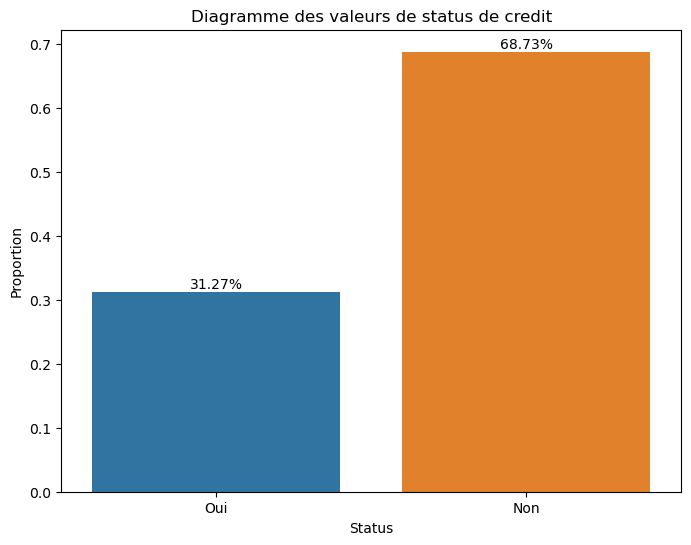

In [55]:
#fiasons le diagramme

plt.figure(figsize=(8,6)) # definir la taille de mon cadre
#ax = sns.countplot(nouvelle_valeur_status)
oui = nouvelle_valeur_status.value_counts()[0]/len(nouvelle_valeur_status)
non = nouvelle_valeur_status.value_counts()[1]/len(nouvelle_valeur_status)
# Créer un diagramme à barres avec deux catégories
sns.barplot(x=['Oui', 'Non'], y=[oui, non])

# Ajouter les proportions au-dessus des barres
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title("Diagramme des valeurs de status de credit")
plt.xlabel("Status")
plt.ylabel("Proportion")

# Afficher le diagramme
plt.show()

#print(f'Le porcentage des credits accordes est: {oui}')
#print(f'Le porcentage des credits non accordes est : {non}')

C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


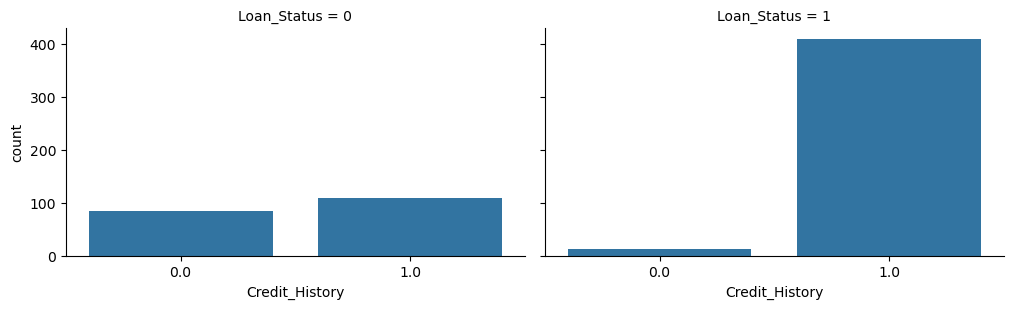

In [57]:
# ce code on peut trouver sur la documentation de matplolib ou sur les template
grid = sns.FacetGrid(base_donne_concatene,col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot,'Credit_History')

# ca c'est la relation entre le fait d'accorder un credit ou pas

# la figure de gauche est pour les credit accepte et la figure de droite pour les credit refuses
# on'a droite a accepte le credit pour ceux ki ont deja une historique de credit et on'a refuse pour ceux qui n'en n'ont pas

# a gauche c pour les credits refuse on voit kon'a un equilibre entre ceux ki ont deja un credit et ceux qui n'ont pas encore de credit

# ce kil fo remarquer sur cet figure es ke kan tu as un historik de credit tu a beaucoup de chance ke ton credit soit accepte

C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


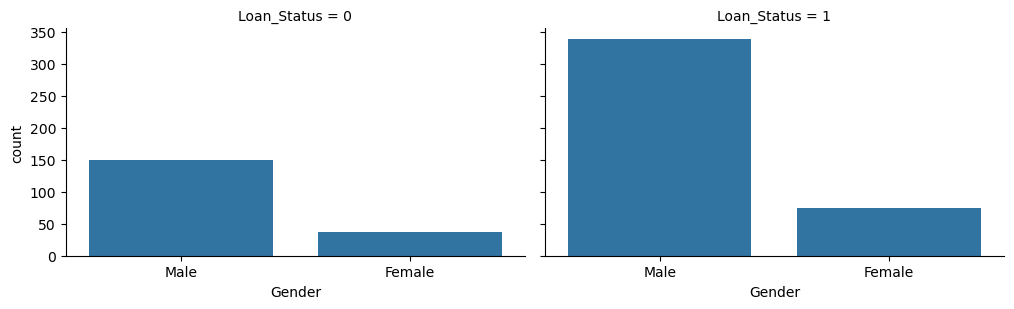

In [58]:
#faisons le aussi pour le sexe
grid = sns.FacetGrid(base_donne_concatene,col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot,'Gender')

# ici ceux kon peut accorder plus de credit sont les hommes

C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


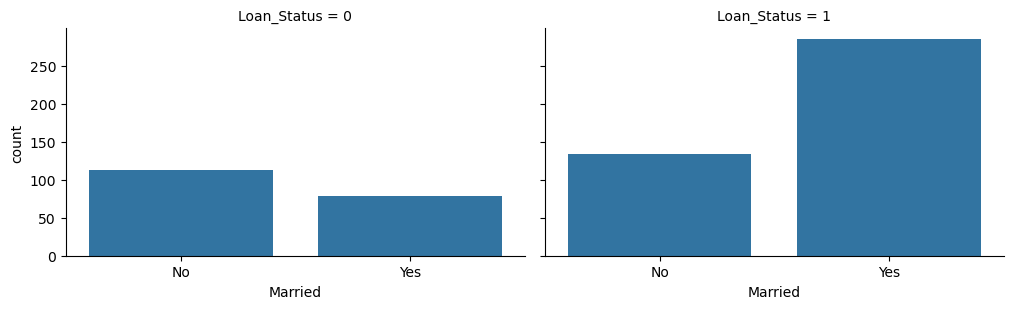

In [59]:
#faisons le married pour savoir si ca un impact
grid = sns.FacetGrid(base_donne_concatene,col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot,'Married')
#ici les gens marries sont plus favorables a obtenir le credit que les gens non marries

C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DAVID T\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


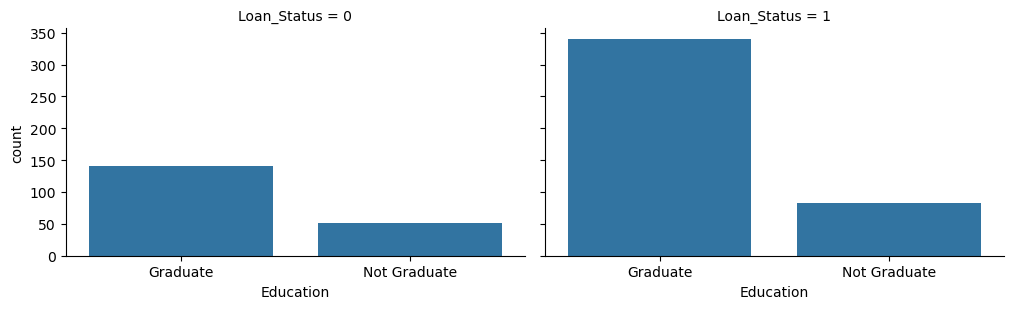

In [60]:
#faisons le niveau d'education pour savoir si ca un impact
grid = sns.FacetGrid(base_donne_concatene,col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot,'Education')

In [ ]:
# il faut le faire egalement pour les autres variables

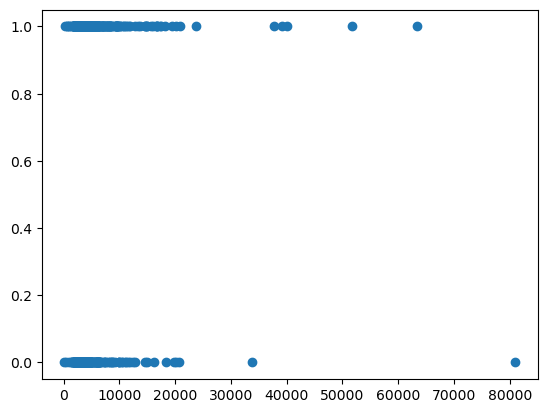

In [61]:
#Voyons la relation entre le salaire et le fait que ca soit un credit accepte ou pas 
# comme c une variable numerique on va utiliser un autre type de diagramme

plt.scatter(base_donne_concatene['ApplicantIncome'],base_donne_concatene['Loan_Status'])

# ici on voit kil ya pas vraiment d'impact car on 1 credit accepte , 0 refuse refuse

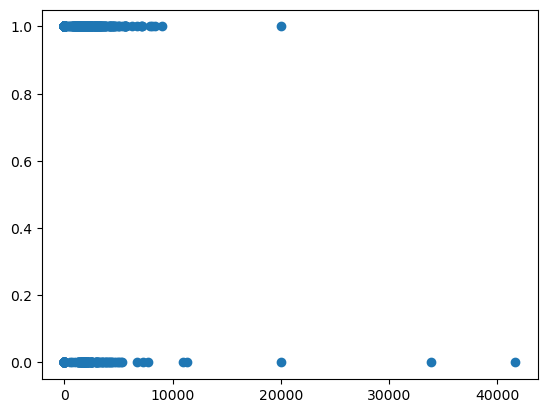

In [62]:
#imact du revenu du conjoint
plt.scatter(base_donne_concatene['CoapplicantIncome'],base_donne_concatene['Loan_Status'])

In [ ]:
base_donne_concatene.groupby('Loan_Status').median()

In [10]:
# Preparation de notre modele en utilisant les algorithmes du machine learning
#Avant de creer notre modele on va diviser notre base de donne en 2 a savoir une base de donnee d'entrainement et une base de donne de test
#les parametres kon va retrouver dans la partie test sont des parametres ki prenent un peu de tout de la variable d'entrainement
#dans notre base de donne test on va retrouver des profils qukel ona refuse des credit et des profils
# aukel ona acepte des credit et avec les meme proportion en essayant de respecter les proportion entre
#les donnes test et les donnes d'entrainement
# la j'importe le package ki permet de le faire

# sss est une instaciation de ma division
#20 de mes donnes pour la partie test car il ne faut pas mettre tous les 100pourcent dans
#le modelel d'entrainement pourcent partie test si non le modele conaitra deja ca et tu ne pourra pas tester la performance de ton model car il connait deja tes profils
#pourcent partie test





sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('Taille de X_train :', X_train.shape)
print('Taille de X_test :', X_test.shape)
print('Taille de y_train :', y_train.shape)
print('Taille de y_test :', y_test.shape)

NameError: name 'X' is not defined

In [ ]:
#creons notre modele on va appliker 3 modeles de machine learning on va les 
#evaluer et on va prendre le meilleur a savoir la regression logistique, KNN et DecisionTree
# selon le type de probleme on peut utiliser plus

# Voici la liste de nos modeles

models = {
    'LogisticRegression':LogisticRegression(radon_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

# pour la fonction de precision on doit importer une metrique
#évaluer la précision d'un modèle de classification
#ce metrik permet de comparer les valeurs predites avec les valeurs reelles

def accu(y_true,y_pred,retu:False):
    acc=accuracy(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'La precision du modele est:{acc}')
        
#Fonction d'application des modeles
# les varaibles d'entre seront le modele,

def evaluation_modele(models,X_train, y_train, X_test,y_test):
    for name,model in models.item():
        print(name,':')
#Applikon le model
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)
#faisons maintenant une evaluation du modele

#Aooliquons maintenant nos trois modeles et voyons le modele ki a la meilleure performance

application_trois_model(models,X_train, y_train, X_test,y_test )


In [1]:
#Creons une nouvelle base de donne sur lakel on dois appliker notre modele

# pour le faire regarder les variables ki ont un impact sur les diagrammes plus haut

#cette base de donne sera egalement utilise pour faire le deploiement de notre model

#pour ajouter une sous base de donne il faut ajouter deux crochets[]

#et ca seront les champ qu'on verra sur notre formulaire

base_donnee_application_modele=X[['Credit_History','CoapplicantIncome','Education','Gender','ApplicantIncome']]

NameError: name 'X' is not defined

In [ ]:
# on va donc appliker notre modele
# il faut definir de nouveau X_train et X_test


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(base_donnee_application_modele,y):
    X_train, X_test = base_donnee_application_modele.iloc[train], base_donnee_application_modele.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('Taille de X_train :', X_train.shape)
print('Taille de X_test :', X_test.shape)
print('Taille de y_train :', y_train.shape)
print('Taille de y_test :', y_test.shape)

In [ ]:
#Voyons maintenant comment deployer ce modele pour l'implement dans une application en utilisant le framework flask

In [ ]:
# Le modele le mieux aprprie es la regression logistique on va donc appliquer la 
#regression logistique sur notre base de donnee

Classifier = LogisticRegression()
Classifier.fit(base_donnee_application_modele,y)

In [3]:
#enregistrons le modele pour le deployer on va utiliser pickle

pickle.dump(Classifier,open('model.pkl','wb'))

NameError: name 'Classifier' is not defined

In [ ]:
#ensuite on va telecharger le modele